#Real-Python-Recommendation Engine With Collaborative Filtering
https://realpython.com/build-recommendation-engine-collaborative-filtering/

#*Etapas envolvidas na filtragem colaborativa
Para construir um sistema que possa recomendar itens automaticamente aos usuários com base nas preferências de outros usuários, a primeira etapa é encontrar usuários ou itens semelhantes. A segunda etapa é prever as avaliações dos itens que ainda não foram avaliados por um usuário. Portanto, você precisará das respostas a estas perguntas:

1. Como você determina quais usuários ou itens são semelhantes entre si?
2. Dado que você sabe quais usuários são semelhantes, como você determina a classificação que um usuário daria a um item com base nas classificações de usuários semelhantes?
3. Como você mede a precisão das classificações que você calcula?

As duas primeiras perguntas não têm respostas únicas. A filtragem colaborativa é uma família de algoritmos em que existem várias maneiras de localizar usuários ou itens semelhantes e várias maneiras de calcular a classificação com base nas classificações de usuários semelhantes. Dependendo das escolhas que você faz, você acaba com um tipo de abordagem de filtragem colaborativa. Você verá as várias abordagens para encontrar semelhanças e prever classificações neste artigo.

Uma coisa importante a se ter em mente é que em uma abordagem baseada puramente na filtragem colaborativa, a similaridade não é calculada usando fatores como idade dos usuários, gênero do filme ou quaisquer outros dados sobre usuários ou itens. É calculado apenas com base na classificação (explícita ou implícita) que um usuário dá a um item. Por exemplo, dois usuários podem ser considerados semelhantes se derem as mesmas classificações a dez filmes, apesar de haver uma grande diferença de idade.

A terceira pergunta sobre como medir a precisão de suas previsões também tem várias respostas, que incluem técnicas de cálculo de erro que podem ser usadas em muitos lugares e não apenas em recomendações com base em filtragem colaborativa.

Uma das abordagens para medir a precisão do seu resultado é o Root Mean Square Error (RMSE), no qual você prevê classificações para um conjunto de dados de teste de pares de itens de usuário cujos valores de classificação já são conhecidos. A diferença entre o valor conhecido e o valor previsto seria o erro. Quadrado todos os valores de erro para o conjunto de teste, encontre a média (ou média) e, em seguida, tire a raiz quadrada dessa média para obter o RMSE.

#*Baseado em memória
A primeira categoria inclui algoritmos baseados na memória, nos quais técnicas estatísticas são aplicadas a todo o conjunto de dados para calcular as previsões.

Para encontrar a classificação R que um usuário U daria a um item I , a abordagem inclui:

Encontrar usuários semelhantes a U que classificaram o item I
Calculando a avaliação R com base nas avaliações dos usuários encontrados na etapa anterior

##Como encontrar usuários semelhantes com base em classificações
Para entender o conceito de similaridade, vamos criar um conjunto de dados simples primeiro.

Os dados incluem quatro usuários A , B , C e D , que avaliaram dois filmes. As classificações são armazenadas em listas e cada lista contém dois números que indicam a classificação de cada filme:

As avaliações de A são [1.0, 2.0].
As avaliações de B são [2.0, 4.0].
As avaliações de C são [2.5, 4.0].
As avaliações de D são [4.5, 5.0].

Olhar a distância entre os pontos parece ser uma boa maneira de estimar a similaridade, certo? Você pode encontrar a distância usando a fórmula da distância euclidiana entre dois pontos. Você pode usar a função disponível scipy conforme mostrado no seguinte programa:

##Distancia Euclidiana

In [3]:
from scipy import spatial
a=[1,2]
b=[2,4]
c=[2.5,4]
d=[4.5,5]
print(spatial.distance.euclidean(c,a))
print(spatial.distance.euclidean(c,b))
print(spatial.distance.euclidean(c,d))

2.5
0.5
2.23606797749979


##Distância cosseno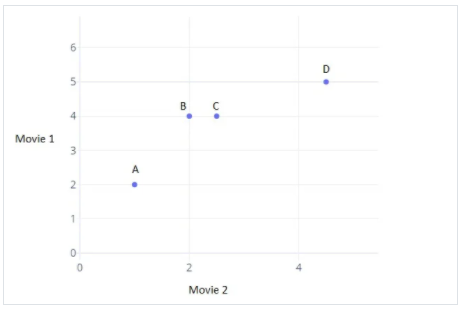

Conforme mostrado acima, você pode usar scipy.spatial.distance.euclideanpara calcular a distância entre dois pontos. Usando-o para calcular a distância entre as classificações de A , B , e D para a de C mostra-nos que, em termos de distância, as classificações de C são os mais próximos àqueles de B .

Você pode ver que o usuário C está mais próximo de B, mesmo olhando para o gráfico. Mas de A e D apenas, de quem C está mais próximo?

Você poderia dizer que C está mais perto de D em termos de distância. Mas olhando para as classificações, parece que as escolhas de C se alinham com as de A mais do que D porque A e C gostam do segundo filme quase duas vezes mais do que do primeiro, mas D gosta de ambos os filmes igualmente.

Então, o que você pode usar para identificar esses padrões que a distância euclidiana não consegue? O ângulo entre as linhas que unem os pontos à origem pode ser usado para tomar uma decisão? Você pode dar uma olhada no ângulo entre as linhas que unem a origem do gráfico aos respectivos pontos, conforme mostrado: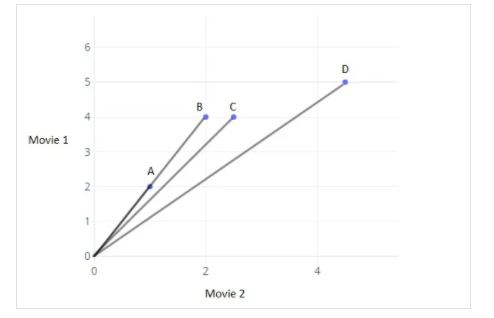

In [4]:
a=[1,2]
b=[2,4]
c=[2.5,4]
d=[4.5,5]
print(spatial.distance.cosine(c,a))
print(spatial.distance.cosine(c,b))
print(spatial.distance.cosine(c,d))

0.004504527406047898
0.004504527406047898
0.015137225946083022


Observe que os usuários A e B são considerados absolutamente semelhantes na métrica de similaridade de cosseno, apesar de terem classificações diferentes. Na verdade, essa é uma ocorrência comum no mundo real, e usuários como o usuário A são o que você pode chamar de avaliadores rigorosos . Um exemplo seria um crítico de cinema que sempre dá classificações mais baixas do que a média, mas os rankings dos itens em sua lista seria semelhante aos avaliadores Média como B .

Para levar em consideração essas preferências individuais do usuário, você precisará colocar todos os usuários no mesmo nível, removendo seus preconceitos. Você pode fazer isso subtraindo a classificação média dada por aquele usuário a todos os itens de cada item classificado por aquele usuário. Seria assim:

Para o usuário A , o vetor de classificação [1, 2]tem a média 1.5. Subtrair 1.5de cada classificação forneceria o vetor [-0.5, 0.5].
Para o usuário B , o vetor de classificação [2, 4]tem a média 3. Subtraindo 3de todas as classificações, você obtém o vetor [-1, 1].
Ao fazer isso, você alterou o valor da avaliação média dada por cada usuário para 0. Tente fazer o mesmo para os usuários C e D , e você verá que as avaliações agora estão ajustadas para fornecer uma média de 0 para todos os usuários , o que os coloca todos no mesmo nível e remove seus preconceitos.

##Como calcular as classificações
Depois de ter determinado uma lista de usuários semelhantes a um usuário U , você precisa calcular a classificação R , que U daria para um determinado item I . Novamente, assim como a semelhança, você pode fazer isso de várias maneiras.

Você pode prever que a classificação de um usuário R para um item I será próximo da média das classificações dadas a I pelos top 5 ou top 10 usuários mais semelhantes a U . A fórmula matemática para a classificação média dada por n usuários seria assim:

Fórmula para avaliação média
Esta fórmula mostra que a classificação média dada pelos n usuários semelhantes é igual à soma das classificações dadas por eles dividida pelo número de usuários semelhantes, que é n .

Haverá situações em que os n utilizadores semelhantes que você encontrou não são igualmente semelhante ao usuário de destino U . Os três primeiros podem ser muito semelhantes e o resto pode não ser tão semelhante a U quanto os três primeiros. Nesse caso, você pode considerar uma abordagem em que a classificação do usuário mais semelhante importa mais do que o segundo usuário mais semelhante e assim por diante. A média ponderada pode nos ajudar a conseguir isso.

Na abordagem de média ponderada, você multiplica cada classificação por um fator de similaridade (que informa o quão semelhantes os usuários são). Ao multiplicar pelo fator de similaridade, você adiciona pesos às classificações. Quanto mais pesado for o peso, mais a classificação terá importância.

O fator de similaridade, que atuaria como pesos, deve ser o inverso da distância discutida acima porque menos distância implica maior similaridade. Por exemplo, você pode subtrair a distância do cosseno de 1 para obter a similaridade do cosseno.

Com o fator de similaridade S para cada usuário semelhante ao usuário-alvo U , você pode calcular a média ponderada usando esta fórmula:

Fórmula para avaliação média ponderada
Na fórmula acima, cada avaliação é multiplicada pelo fator de similaridade do usuário que deu a avaliação. A classificação final prevista pelo usuário U será igual à soma das classificações ponderadas dividida pela soma dos pesos.


##Filtragem colaborativa com base no usuário e com base no item
A técnica nos exemplos explicados acima, em que a matriz de classificação é usada para encontrar usuários semelhantes com base nas classificações que eles dão, é chamada de filtragem colaborativa usuário-usuário ou usuário-usuário. Se você usar a matriz de classificação para encontrar itens semelhantes com base nas classificações dadas a eles pelos usuários, a abordagem é chamada de filtragem colaborativa item-item ou baseada em item.

As duas abordagens são matematicamente muito semelhantes, mas há uma diferença conceitual entre as duas. Veja como os dois se comparam:

Com base no usuário: para um usuário U , com um conjunto de usuários semelhantes determinados com base em vetores de classificação que consistem em determinadas classificações de itens, a classificação de um item I , que não foi classificado, é encontrada selecionando N usuários da similaridade lista quem classificou o item I e calcula a classificação com base nessas N classificações.

Com base em item : para um item I , com um conjunto de itens semelhantes determinados com base em vetores de classificação que consistem em classificações de usuários recebidas, a classificação de um usuário U , que não avaliou, é encontrada escolhendo N itens da similaridade lista que foi classificada por U e calculando a classificação com base nessas classificações N.

#*Baseado em modelo

A segunda categoria cobre as abordagens baseadas no modelo, que envolvem uma etapa para reduzir ou comprimir a grande, mas esparsa matriz de itens do usuário. Para compreender esta etapa, uma compreensão básica da redução da dimensionalidade pode ser muito útil.

##Redução de dimensionalidade
Na matriz de itens do usuário, existem duas dimensões:

1. O número de usuários
1. O número de itens
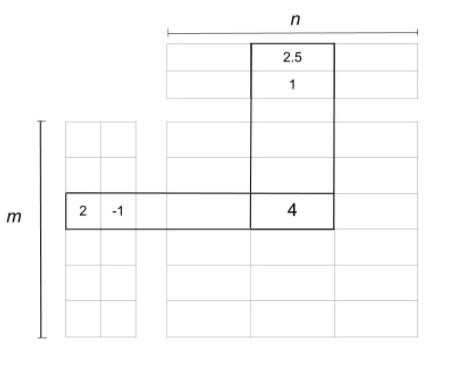
Se a matriz estiver quase vazia, reduzir as dimensões pode melhorar o desempenho do algoritmo em termos de espaço e tempo. Você pode usar vários métodos como fatoração de matriz ou codificadores automáticos para fazer isso.

A fatoração de matrizes pode ser vista como a divisão de uma grande matriz em um produto de outras menores. Isso é semelhante à fatoração de inteiros, onde 12pode ser escrito como 6 x 2ou 4 x 3. No caso de matrizes, uma matriz A com dimensões m x npode ser reduzida a um produto de duas matrizes X e Y com dimensões m x pe p x nrespectivamente.

Na imagem acima, a matriz é reduzida em duas matrizes. O da esquerda é a matriz do usuário com m usuários e o do topo é a matriz do item com n itens. A classificação 4é reduzida ou fatorada em:

Um vetor de usuário (2, -1)
Um vetor de item (2.5, 1)


##Algoritmos para fatoração de matriz
Um dos algoritmos populares para fatorar uma matriz é o algoritmo de decomposição de valor singular (SVD). SVD ganhou destaque quando a fatoração de matrizes foi vista com um bom desempenho na competição de prêmios da Netflix. Outros algoritmos incluem PCA e suas variações, NMF e assim por diante. Autoencoders também podem ser usados ​​para redução de dimensionalidade, caso você queira usar Redes Neurais.

##Usando Python para construir recomendações
Existem algumas bibliotecas e kits de ferramentas em Python que fornecem implementações de vários algoritmos que você pode usar para construir um recomendador. Mas aquele que você deve experimentar enquanto entende os sistemas de recomendação é o surprise .

Surprise é um Python SciKit que vem com vários algoritmos de recomendação e métricas de similaridade para facilitar a construção e análise de recomendações.

In [5]:
!pip install numpy
!pip install scikit-surprise

     |████████████████████████████████| 11.8MB 5.7MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617588 sha256=483b693f78e220a12db15583c51a7eadf9e0ef81299c68aa8abfeb3859a0d844
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


Este é um programa que você pode usar para carregar dados de um dataframe Pandas ou do conjunto de dados MovieLens 100k integrado:

In [7]:
# load_data.py

import pandas as pd
from surprise import Dataset
from surprise import Reader

# This is the same data that was plotted for similarity earlier
# with one new user "E" who has rated only movie 1
ratings_dict = {
    "item": [1, 2, 1, 2, 1, 2, 1, 2, 1],
    "user": ['A', 'A', 'B', 'B', 'C', 'C', 'D', 'D', 'E'],
    "rating": [1, 2, 2, 4, 2.5, 4, 4.5, 5, 3],
}

df = pd.DataFrame(ratings_dict)
reader = Reader(rating_scale=(1, 5))

# Loads Pandas dataframe
data = Dataset.load_from_df(df[["user", "item", "rating"]], reader)
# Loads the builtin Movielens-100k data
movielens = Dataset.load_builtin('ml-100k')


No programa acima, os dados são armazenados em um dicionário que é carregado em um dataframe do Pandas e, em seguida, em um objeto Dataset da Surprise.

##Algoritmos baseados em K-vizinhos mais próximos (k-NN)
A escolha do algoritmo para a função de recomendação depende da técnica que você deseja usar. Para as abordagens baseadas em memória discutidas acima, o algoritmo que se encaixaria na conta é Centrado k-NN porque o algoritmo está muito próximo da fórmula de similaridade cosseno centrada explicada acima. Ele está disponível em Surprise como KNNWithMeans.

Para encontrar a similaridade, você simplesmente precisa configurar a função passando um dicionário como um argumento para a função do recomendador. O dicionário deve ter as chaves necessárias, como as seguintes:

namecontém a métrica de similaridade a ser usada. As opções são cosine, msd, pearson, ou pearson_baseline. O padrão é msd.
user_basedé um booleanque informa se a abordagem será baseada no usuário ou baseada no item. O padrão é True, o que significa que a abordagem baseada no usuário será usada.
min_supporté o número mínimo de itens comuns necessários entre os usuários para considerá-los quanto à semelhança. Para a abordagem baseada em itens, isso corresponde ao número mínimo de usuários comuns para dois itens.
O programa a seguir configura a KNNWithMeansfunção:

In [17]:
# recommender.py

from surprise import KNNWithMeans

# To use item-based cosine similarity
sim_options = {
    "name": "cosine",
    "user_based": False,  # Compute  similarities between items
}
algo = KNNWithMeans(sim_options=sim_options)

A função de recomendação no programa acima é configurada para usar a similaridade do cosseno e para encontrar itens semelhantes usando a abordagem baseada em item.

Para experimentar este recomendador, você precisa criar um Trainsetde data. Trainseté construído usando os mesmos dados, mas contém mais informações sobre os dados, como o número de usuários e itens ( n_users, n_items) que são usados ​​pelo algoritmo. Você pode criá-lo usando todos os dados ou parte dos dados. Você também pode dividir os dados em dobras, onde alguns dos dados serão usados ​​para treinamento e outros para teste.

In [16]:
from load_data import data
from recommender import algo

trainingSet = data.build_full_trainset()

algo.fit(trainingSet)

prediction = algo.predict('E', 2)
prediction.est

ModuleNotFoundError: ignored

##Ajustando os parâmetros do algoritmo
Surprise fornece uma GridSearchCVclasse análoga a GridSearchCV de scikit-learn.

Com um dictde todos os parâmetros, GridSearchCVtenta todas as combinações de parâmetros e relata os melhores parâmetros para qualquer medida de precisão

Por exemplo, você pode verificar qual métrica de similaridade funciona melhor para seus dados em abordagens baseadas em memória:

In [18]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise.model_selection import GridSearchCV

data = Dataset.load_builtin("ml-100k")
sim_options = {
    "name": ["msd", "cosine"],
    "min_support": [3, 4, 5],
    "user_based": [False, True],
}

param_grid = {"sim_options": sim_options}

gs = GridSearchCV(KNNWithMeans, param_grid, measures=["rmse", "mae"], cv=3)
gs.fit(data)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Portanto, para o conjunto de dados MovieLens 100k, o algoritmo Centered-KNN funciona melhor se você usar a abordagem baseada em itens e usar msd como a métrica de similaridade com suporte mínimo 3.

Da mesma forma, para abordagens baseadas em modelo, podemos usar Surprisepara verificar quais valores para os seguintes fatores funcionam melhor:

n_epochs é o número de iterações do SGD, que é basicamente um método iterativo usado em estatísticas para minimizar uma função.
lr_all é a taxa de aprendizado para todos os parâmetros, que é um parâmetro que decide quanto os parâmetros são ajustados em cada iteração.
reg_all é o termo de regularização para todos os parâmetros, que é um termo de penalidade adicionado para evitar sobreajuste.

O programa a seguir verificará os melhores valores para o algoritmo SVD , que é um algoritmo de fatoração de matriz:

In [19]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import GridSearchCV

data = Dataset.load_builtin("ml-100k")

param_grid = {
    "n_epochs": [5, 10],
    "lr_all": [0.002, 0.005],
    "reg_all": [0.4, 0.6]
}
gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], cv=3)

gs.fit(data)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

0.9641671131881968
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


Portanto, para o conjunto de dados MovieLens 100k, o SVDalgoritmo funciona melhor se você usar 10 épocas e usar uma taxa de aprendizado de 0,005 e regularização de 0,4.

Outros algoritmos baseados em Matrix Factorization disponíveis em Surprisesão SVD ++ e NMF .

Seguindo esses exemplos, você pode mergulhar fundo em todos os parâmetros que podem ser usados ​​nesses algoritmos. Você definitivamente deve verificar a matemática por trás deles. Como você não terá que se preocupar muito com a implementação de algoritmos inicialmente, os recomendadores podem ser uma ótima maneira de entrar no campo do aprendizado de máquina e construir um aplicativo baseado nisso.

#Quando a filtragem colaborativa pode ser usada?
A filtragem colaborativa contorna as interações que os usuários têm com os itens. Essas interações podem ajudar a encontrar padrões que os dados sobre os itens ou os próprios usuários não conseguem. Aqui estão alguns pontos que podem ajudá-lo a decidir se a filtragem colaborativa pode ser usada:

A filtragem colaborativa não requer que recursos sobre os itens ou usuários sejam conhecidos. É adequado para um conjunto de diferentes tipos de itens, por exemplo, o estoque de um supermercado onde itens de várias categorias podem ser adicionados. Em um conjunto de itens semelhantes, como o de uma livraria, no entanto, recursos conhecidos como escritores e gêneros podem ser úteis e podem se beneficiar de abordagens baseadas em conteúdo ou híbridas.

A filtragem colaborativa pode ajudar os recomendadores a não superespecializar o perfil de um usuário e recomendar itens completamente diferentes do que eles viram antes. Se você quiser que seu recomendador não sugira um par de tênis para alguém que acabou de comprar outro par de tênis semelhante, tente adicionar filtragem colaborativa ao seu feitiço de recomendação.

Embora a Filtragem colaborativa seja muito comumente usada em recomendadores, alguns dos desafios enfrentados ao usá-la são os seguintes:

A filtragem colaborativa pode levar a alguns problemas, como inicialização a frio para novos itens adicionados à lista. Até que alguém os classifique, eles não são recomendados.

A dispersão de dados pode afetar a qualidade dos recomendadores baseados no usuário e também aumentar o problema de inicialização a frio mencionado acima.

O dimensionamento pode ser um desafio para conjuntos de dados em crescimento, pois a complexidade pode se tornar muito grande. Recomendadores com base em itens são mais rápidos do que com base no usuário quando o conjunto de dados é grande.

Com uma implementação direta, você pode observar que as recomendações tendem a já ser populares e os itens da seção de cauda longa podem ser ignorados.

Com cada tipo de algoritmo de recomendação tendo sua própria lista de prós e contras, geralmente é um recomendador híbrido que vem ao resgate. Os benefícios de vários algoritmos trabalhando juntos ou em um pipeline podem ajudá-lo a configurar recomendações mais precisas. Na verdade, a solução do vencedor do prêmio Netflix também foi uma mistura complexa de vários algoritmos.